In [1]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn import model_selection
import shap 
import matplotlib.pyplot as plt
import matplotlib
#plt.rc('text', usetex=True)
#matplotlib.rcParams.update({'font.size': 14})


plt.scatter(x_all['max_load_pred'],x_all['max_load_pred'])
plt.xlabel('max load')

In [2]:
# Defining modle metrics
from sklearn.metrics import r2_score
def R2(y_true, y_pred):
    return round(r2_score(y_true, y_pred),3)
from sklearn.metrics import mean_squared_log_error
def MSLE(y_true, y_pred):
    return mean_squared_log_error(y_true, y_pred)
from sklearn.metrics import explained_variance_score
def EX_VAR(y_true, y_pred):
    return explained_variance_score(y_true, y_pred)
from sklearn.metrics import mean_absolute_error
def MAE(y_true, y_pred):
    return round(mean_absolute_error(y_true, y_pred),3)
from sklearn.metrics import mean_squared_error
def RMSE(y_true, y_pred):
    return round(mean_squared_error(y_true, y_pred,squared=True),3)

In [5]:
#Reading the data and droping a useless column and droping all rows with Nan values
#Scenario V-Modified.xlsx
DataSet = pd.read_excel( 'data.xlsx').drop(columns=['name','DOI','content (%)', 'concrete elastic modulus(GPa)',
                                                          'Ductility index(deltap/deltay)','steel fiber type' ]).dropna()
# Making one hot encoding of a column
#data = pd.get_dummies(data=DataSet, columns=['steel fiber type'])
#data = data.drop(columns = ['Soil Type_Fissured'])
#data = data[data['Soil Type_Intact']>0]
# adding a new column with name Kfold, later we will use it 
data = DataSet.copy()

# scaling
scaler = MinMaxScaler()
scaler.fit(data)
#data = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)

data['kfold'] = -1
print(data.columns)
print(len(data))
data.head(5)

Index(['fiber aspect ratio(mm/mm)', 'fiber density(g/cm3)',
       'volume fraction(%)', 'reinforcement ratio(%)', 'beam width(mm)',
       'beam height(mm)', 'beam length(mm)', 'shear span-depth ratio',
       'fiber tensile strength(MPa)', 'Ductility index(deltau/deltay)',
       'Max Load', 'Deltap', 'kfold'],
      dtype='object')
184


,fiber aspect ratio(mm/mm),fiber density(g/cm3),volume fraction(%),reinforcement ratio(%),beam width(mm),beam height(mm),beam length(mm),shear span-depth ratio,fiber tensile strength(MPa),Ductility index(deltau/deltay),Max Load,Deltap,kfold
0,0.0,0.0,0.0,0.94,150,220,2500,5.0,0,10.34,62.6,94.53,-1
1,0.0,0.0,0.0,1.50,150,220,2500,5.0,0,6.06,97.9,73.03,-1
2,65.0,7.9,2.0,0.94,150,220,2500,5.0,2788,4.40,87.3,28.41,-1
3,65.0,7.9,2.0,1.50,150,220,2500,5.0,2788,4.04,124.1,20.30,-1
4,97.5,7.9,2.0,0.94,150,220,2500,5.0,2500,4.39,93.3,30.51,-1


In [6]:
#Random shuffling the data 
df = data.sample(frac= 1, random_state=10).reset_index(drop=True)

#Adding numbers for each fold of data to the Kfold column 
kf = model_selection.KFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

# check the Kfold column, now we can select a scpecific chunk of data with using Kfold column
df.head(3)

,fiber aspect ratio(mm/mm),fiber density(g/cm3),volume fraction(%),reinforcement ratio(%),beam width(mm),beam height(mm),beam length(mm),shear span-depth ratio,fiber tensile strength(MPa),Ductility index(deltau/deltay),Max Load,Deltap,kfold
0,0.0,0.0,0.00,0.90,125,250,3000,4.00,1225,1.65,87.5,17.25,0
1,45.0,7.8,2.00,0.70,150,150,1200,2.45,1100,3.20,78.0,7.50,0
2,64.0,7.8,0.76,0.15,240,300,3200,2.83,1345,3.90,40.0,23.80,0


In [7]:
df.columns

Index(['fiber aspect ratio(mm/mm)', 'fiber density(g/cm3)',
       'volume fraction(%)', 'reinforcement ratio(%)', 'beam width(mm)',
       'beam height(mm)', 'beam length(mm)', 'shear span-depth ratio',
       'fiber tensile strength(MPa)', 'Ductility index(deltau/deltay)',
       'Max Load', 'Deltap', 'kfold'],
      dtype='object')

In [8]:

n_estimators = 5000
learning_rate = 0.01
min_samples_leaf = 1
min_samples_split = 2
max_depth = 1
result = []

for i in range (1):

    print ('////////////   fold  {}  ////////////'.format(i))

    n_estimators = 3000
    learning_rate = 0.001
    min_samples_leaf = 6
    min_samples_split = 4
    max_depth = 6

    # ******* model I *****************************************
    test_fold = i
    x_all = df.drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    x_train = df[df['kfold']!= test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    y_train = df[df['kfold']!= test_fold]['Max Load']
    x_test = df[df['kfold']== test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    y_test = df[df['kfold']== test_fold]['Max Load']

    # training the first GBM with data
    GB_1 = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate
    ,min_samples_leaf=min_samples_leaf ,min_samples_split=min_samples_split, max_depth=max_depth)
    GB_1.fit(x_train,y_train)
    pred_train_max_load = GB_1.predict(x_train)
    pred_test_max_load = GB_1.predict(x_test)
    explainer = shap.Explainer(GB_1)
    shap_values_GB1 = explainer(x_test)

    print ('*****test*****')
    print ('R2 Max load on {} fold = '.format(i), R2(y_test,pred_test_max_load.flatten()))
    print ('MAE Max load on {} fold = '.format(i), MAE(y_test,pred_test_max_load.flatten()))
    print ('RMSE Max load on {} fold = '.format(i), RMSE(y_test,pred_test_max_load.flatten()))

    print('****train******')
    print ('R2 Max load on {} fold = '.format(i), R2(y_train,pred_train_max_load.flatten()))
    print ('MAE Max load on {} fold = '.format(i), MAE(y_train,pred_train_max_load.flatten()))
    print ('RMSE Max load on {} fold = '.format(i), RMSE(y_train,pred_train_max_load.flatten()))
    print('size df = ', df.shape)
    # Concatinating max load prediction with the data
    df['max_load_pred'] = GB_1.predict(x_all)

    # ******* model II *****************************************
    n_estimators = 3000
    learning_rate = 0.001
    min_samples_leaf = 6
    min_samples_split = 4
    max_depth = 6

    x_all = df.drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    x_train = df[df['kfold']!= test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    y_train = df[df['kfold']!= test_fold]['Deltap']
    x_test = df[df['kfold']== test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    y_test = df[df['kfold']== test_fold]['Deltap']

    # training the first GBM with data
    GB_2 = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate
    ,min_samples_leaf=min_samples_leaf ,min_samples_split=min_samples_split, max_depth=max_depth)
    GB_2.fit(x_train,y_train)
    pred_train_Deltap = GB_2.predict(x_train)
    pred_test_Deltap = GB_2.predict(x_test)
    explainer = shap.Explainer(GB_2)
    shap_values_GB2 = explainer(x_test)

    print ('*****test*****')
    print ('R2 Deltap on {} fold = '.format(i), R2(y_test,pred_test_Deltap.flatten()))
    print ('MAE Deltap on {} fold = '.format(i), MAE(y_test,pred_test_Deltap.flatten()))
    print ('RMSE Deltap on {} fold = '.format(i), RMSE(y_test,pred_test_Deltap.flatten()))

    print('****train******')
    print ('R2 Deltap on {} fold = '.format(i), R2(y_train,pred_train_Deltap.flatten()))
    print ('MAE Deltap on {} fold = '.format(i), MAE(y_train,pred_train_Deltap.flatten()))
    print ('RMSE Deltap on {} fold = '.format(i), RMSE(y_train,pred_train_Deltap.flatten()))
    print('size df = ', df.shape)
    # Concatinating Deltap prediction with the data
    df['Deltap_pred'] = GB_2.predict(x_all)

    # ******* model III *****************************************
    n_estimators = 3000
    learning_rate = 0.001
    min_samples_leaf = 6
    min_samples_split = 4
    max_depth = 6

    x_all = df.drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    x_train = df[df['kfold']!= test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    y_train = df[df['kfold']!= test_fold]['Ductility index(deltau/deltay)']
    x_test = df[df['kfold']== test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap','kfold'])
    y_test = df[df['kfold']== test_fold]['Ductility index(deltau/deltay)']

    # training the first GBM with data
    GB_3 = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate
    ,min_samples_leaf=min_samples_leaf ,min_samples_split=min_samples_split, max_depth=max_depth)
    GB_3.fit(x_train,y_train)
    pred_train_Ductility_index = GB_3.predict(x_train)
    pred_test_Ductility_index = GB_3.predict(x_test)
    explainer = shap.Explainer(GB_3.predict, x_test)
    shap_values_GB3 = explainer(x_all)

    print ('*****test*****')
    print ('R2 Ductility index on {} fold = '.format(i), R2(y_test,pred_test_Ductility_index.flatten()))
    print ('MAE Ductility index on {} fold = '.format(i), MAE(y_test,pred_test_Ductility_index.flatten()))
    print ('RMSE Ductility index on {} fold = '.format(i), RMSE(y_test,pred_test_Ductility_index.flatten()))

    print('****train******')
    print ('R2 Ductility index on {} fold = '.format(i), R2(y_train,pred_train_Ductility_index.flatten()))
    print ('MAE Ductility index on {} fold = '.format(i), MAE(y_train,pred_train_Ductility_index.flatten()))
    print ('RMSE Ductility index on {} fold = '.format(i), RMSE(y_train,pred_train_Ductility_index.flatten()))
    print('size df = ', df.shape)
    # Concatinating max load prediction with the data
    df['Ductility_index_pred'] = GB_3.predict(x_all)




////////////   fold  0  ////////////
*****test*****
R2 Max load on 0 fold =  0.917
MAE Max load on 0 fold =  20.905
RMSE Max load on 0 fold =  947.917
****train******
R2 Max load on 0 fold =  0.941
MAE Max load on 0 fold =  18.852
RMSE Max load on 0 fold =  1344.899
size df =  (184, 13)
*****test*****
R2 Deltap on 0 fold =  0.69
MAE Deltap on 0 fold =  9.027
RMSE Deltap on 0 fold =  203.528
****train******
R2 Deltap on 0 fold =  0.895
MAE Deltap on 0 fold =  6.117
RMSE Deltap on 0 fold =  120.42
size df =  (184, 14)


Permutation explainer: 185it [02:35,  1.14it/s]                         

*****test*****
R2 Ductility index on 0 fold =  0.395
MAE Ductility index on 0 fold =  1.631
RMSE Ductility index on 0 fold =  5.971
****train******
R2 Ductility index on 0 fold =  0.814
MAE Ductility index on 0 fold =  1.041
RMSE Ductility index on 0 fold =  3.002
size df =  (184, 15)


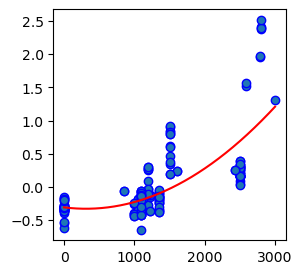

In [12]:
sh = shap_values_GB3[:,"fiber tensile strength(MPa)"]
z = np.polyfit(sh.data,sh.values, 2)
p = np.poly1d(z)
x= np.array(range(-50,300000,1))/100
fig = plt.figure(figsize=(3, 3))
plt.plot(x, p(x), color = 'red')
plt.scatter(sh.data,sh.values,edgecolor='blue', facecolor='tab:blue')
#hist = plt.hist(shap_values_GB3[:,"volume fraction(%)"])
#plt.savefig('shape_new fiber tensile strength.png', dpi = 400)

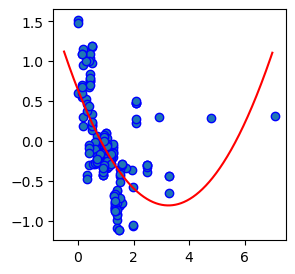

In [13]:
sh = shap_values_GB3[:,'reinforcement ratio(%)']
z = np.polyfit(sh.data,sh.values, 2)
p = np.poly1d(z)
x= np.array(range(-50,700,1))/100
fig = plt.figure(figsize=(3, 3))
plt.plot(x, p(x), color = 'red')
plt.scatter(sh.data,sh.values,edgecolor='blue', facecolor='tab:blue')
#hist = plt.hist(shap_values_GB3[:,"volume fraction(%)"])
#plt.savefig('shape_new reinforcement ratio.png', dpi = 400)

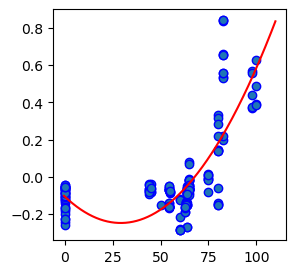

In [14]:
sh = shap_values_GB3[:,'fiber aspect ratio(mm/mm)']
z = np.polyfit(sh.data,sh.values, 2)
p = np.poly1d(z)
x= np.array(range(-50,11000,1))/100
fig = plt.figure(figsize=(3, 3))
plt.plot(x, p(x), color = 'red')
plt.scatter(sh.data,sh.values,edgecolor='blue', facecolor='tab:blue')
#hist = plt.hist(shap_values_GB3[:,"volume fraction(%)"])
#plt.savefig('shape_new fiber aspect ratio.png', dpi = 400)

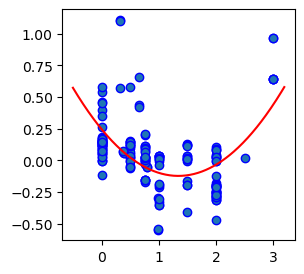

In [15]:
sh = shap_values_GB3[:,'volume fraction(%)']
z = np.polyfit(sh.data,sh.values, 2)
p = np.poly1d(z)
x= np.array(range(-50,320,1))/100
fig = plt.figure(figsize=(3, 3))
plt.plot(x, p(x), color = 'red')
plt.scatter(sh.data,sh.values,edgecolor='blue', facecolor='tab:blue')
#hist = plt.hist(shap_values_GB3[:,"volume fraction(%)"])
#plt.savefig('shape_new volume fraction.png', dpi = 400)

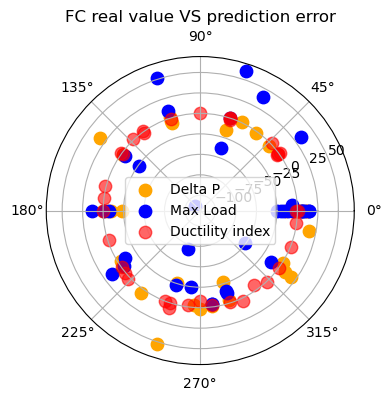

In [18]:
# Compute areas and colors
#N = 150
#area = 200 * r**2 , s=area
#colors = theta

range_error = 1
fig = plt.figure(figsize =(4,4))
ax = fig.add_subplot(projection='polar')

#ax.set_rlim(-1500,2500)
#c = ax.scatter(angel, data['Error'], c=data['Error'], cmap='hsv', alpha=0.75)

y_test = df[df['kfold']== 0]['Deltap']
y_pred = df[df['kfold']== 0]['Deltap_pred']
angel = (1 - y_test/range_error ) * 2 * np.pi
c = ax.scatter(angel, (y_test.to_numpy() - y_pred.to_numpy()), alpha=1, label= 'Delta P', color ='orange',
               s=80,marker = 'o')

y_test = df[df['kfold']== 0]['Max Load']
y_pred = df[df['kfold']== 0]['max_load_pred']
angel = (1 - y_test/range_error ) * 2 * np.pi
c = ax.scatter(angel, (y_test.to_numpy() - y_pred.to_numpy()), alpha=1, color = 'blue',
               label= 'Max Load', s=80,marker = 'o')



y_test = df[df['kfold']== 0]['Ductility index(deltau/deltay)']
y_pred = df[df['kfold']== 0]['Ductility_index_pred']
angel = (1 - y_test/range_error ) * 2 * np.pi
c = ax.scatter(angel, (y_test.to_numpy() - y_pred.to_numpy()), alpha=0.6, color = 'red', label= 'Ductility index',
               s=80,marker = 'o')



ax.legend()
plt.title("FC real value VS prediction error")
plt.savefig('fig.png', dpi = 400)

<function matplotlib.pyplot.show(close=None, block=None)>

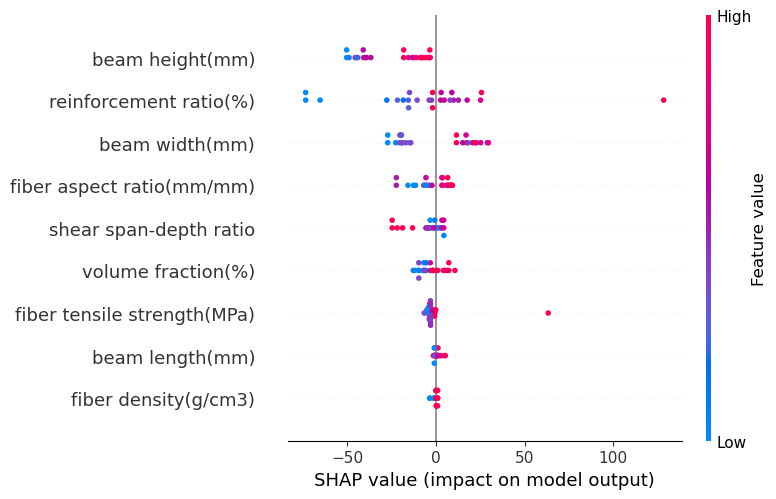

In [24]:
fig = shap.plots.beeswarm(shap_values_GB1[:25,:], show=False)


plt.tight_layout()
#plt.savefig('./shap_fig//shap_Max_load.png', dpi = 400)
plt.show

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


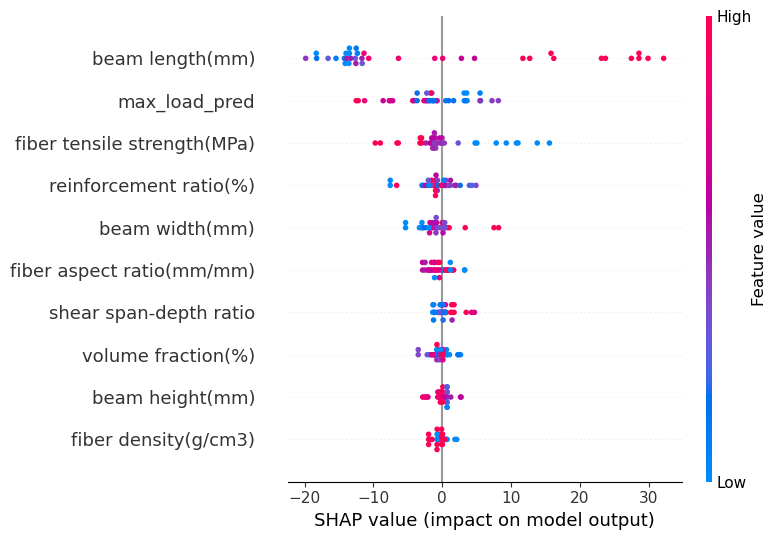

In [19]:
fig = shap.plots.beeswarm(shap_values_GB2[:,:25], show=False)

plt.tight_layout()
#plt.savefig('./shap_fig//shap_DeltaP.png', dpi = 400)


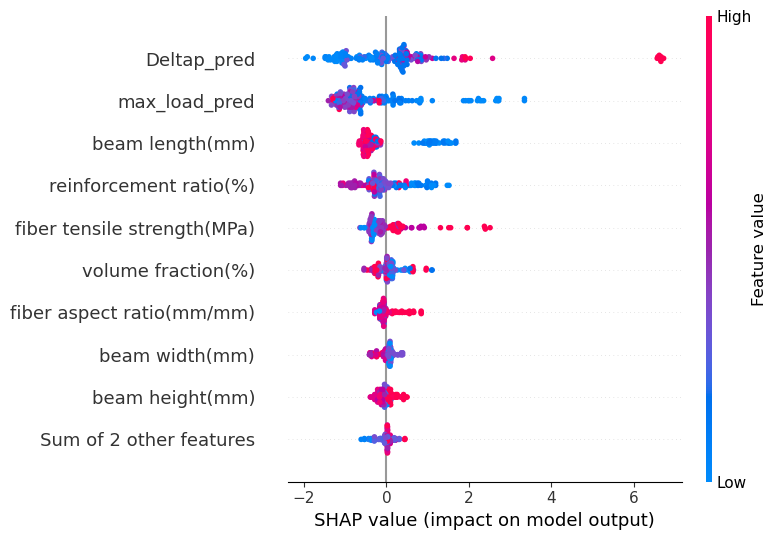

In [20]:
fig = shap.plots.beeswarm(shap_values_GB3[:,:25], show=False)
plt.tight_layout()
#plt.savefig('./shap_fig//shap_Ductility_index.png', dpi = 400)


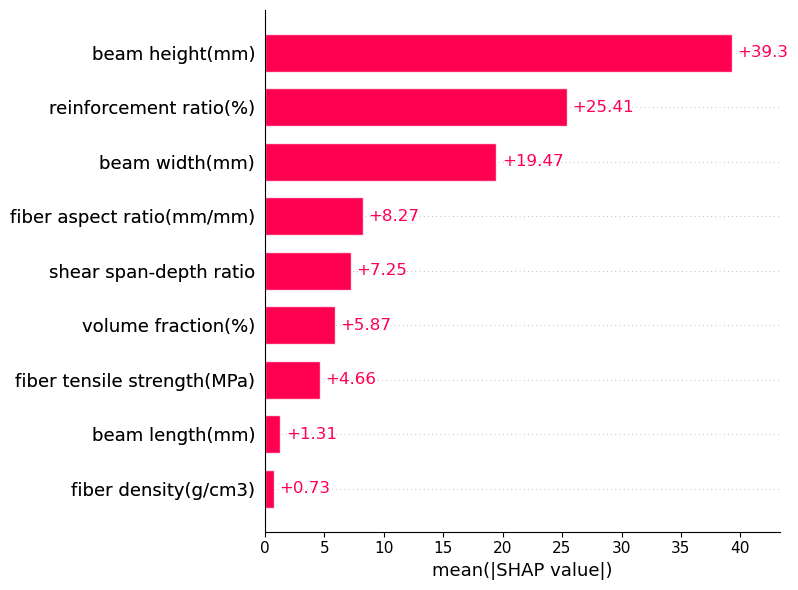

In [21]:
shap.plots.bar(shap_values_GB1, show=False)
plt.tight_layout()
#plt.savefig('./shap_fig//Maxload_bar.png', dpi = 400)

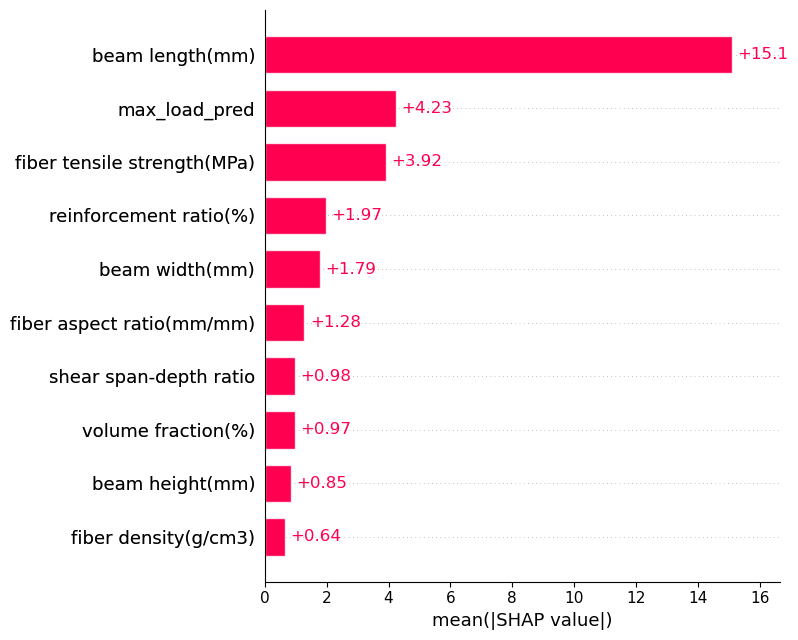

In [22]:
shap.plots.bar(shap_values_GB2, show=False)
plt.tight_layout()
#plt.savefig('./shap_fig//DeltaP_bar.png', dpi = 400)

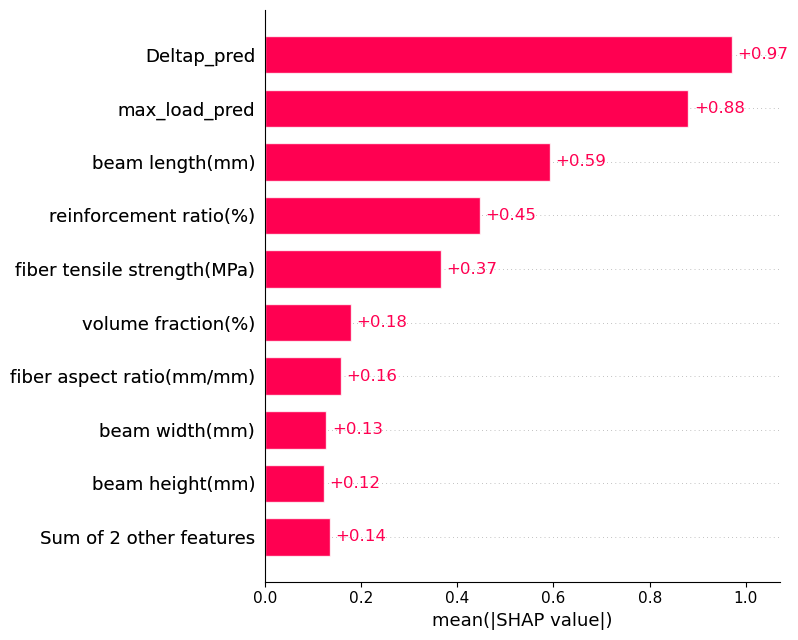

In [23]:
shap.plots.bar(shap_values_GB3, show=False)
plt.tight_layout()
#plt.savefig('./shap_fig//Ductility_index.png', dpi = 400)